## Using Simulated Annealing for the backward step in LSM American Option pricing 

(instead of regression with LSM)

## Algorithm

```
function SimulatedAnnealing(problem)
    current = initial state
    t = 1
    loop
        T = coolDown(t) // t -> T
        if T < Epsilon then return current
        next = random successor of current
        dE = next.Value - current.Value
        if dE > = then current=next
        else current=next with prob e^-dE/T
        t = t+1

```

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

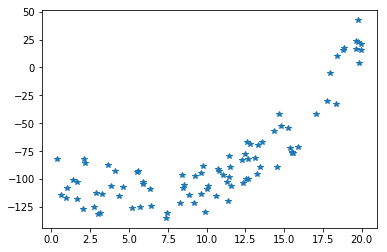

In [307]:
## Make Test Sample
np.random.seed(450000) # seed for Python RNG
def f(x):
    return 3/4 *x*x - 48/5 * x - 772/7

X = 20* np.random.random_sample((90,))

Y = f(X)
Y = Y  +np.random.random_sample((len(X),))*50

plt.plot(X,Y,'*')


In [308]:
reg = np.polyfit(X, Y, 2)
ry = np.polyval(reg, X)
print(reg)
print(ry)

[  0.711479    -8.59622253 -91.41692073]
[ -9.68527080e+01  -4.82891810e+01  -9.66704418e+01  -8.94071985e+01
  -1.13951617e+02  -6.61875687e+01  -1.17224815e+02  -9.23463417e+00
  -8.61597472e+01  -1.06283587e+02  -1.15406498e+02  -1.16012731e+02
  -1.10019047e+02  -8.14828776e+01  -7.98915985e+01   1.66436612e+01
  -7.83047505e+01  -1.06093449e+02  -1.07417747e+02  -1.09721992e+02
  -1.05958988e+02  -1.96144513e+01  -1.17375060e+02  -8.61712092e+01
  -1.08040344e+02  -6.40929178e+01  -9.44595971e+01  -3.15549502e+01
  -1.10253295e+02  -8.50896734e+00  -1.17276355e+02  -1.58933912e+01
  -8.02391638e+01  -1.01941004e+02  -9.64610297e+01  -1.01425640e+02
  -9.93458614e+01  -8.80462935e+01  -1.13428801e+02   1.37748745e+01
  -9.94333552e+01   2.06486906e+01  -1.01479629e+02  -9.60340173e+01
  -5.36395543e+01  -1.16078811e+02  -1.11808594e+02   1.44023023e+01
  -4.76759229e-02  -1.14686515e+02  -9.87642511e+01  -5.57595735e+01
  -5.73811898e+01  -6.85709506e+01  -1.17309630e+02  -6.298784

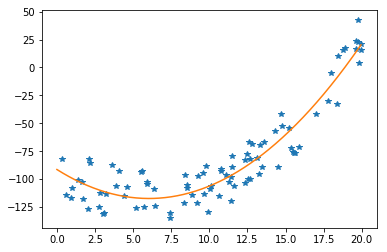

In [309]:
X_ = np.arange(0,20,0.05)
Y_ = reg[0]*X_*X_+reg[1]*X_+reg[2]
plt.plot(X,Y,'*')
plt.plot(X_,Y_)

In [310]:
def coolDown(TS,t):
    return TS*np.exp(-t/5E3)

In [311]:
def random_successor(c,T):
    # Variance of parameter Space
    p = np.random.randn(3)*0.6
    c = c + c*p
    return c

In [312]:
def chi2err(par,X,Y):
    N = len(X)
    s = 0
    for i in range(N):
        tmp = par[0]*X[i]*X[i]+par[1]*X[i]+par[2]-Y[i]
        s += tmp*tmp
    return s/N


In [313]:
def f_plot(X,Y,current):
    X_sim = np.arange(1,20,0.2)
    Y_sim = current[0] * X_sim * X_sim + current[1] * X_sim + current[2]
    plt.plot(X,Y,"*")
    plt.plot(X_sim,Y_sim)
    plt.show()

[  0.711479    10.60377747 -91.41692073]
51043.5670224
[   1.4929099    -7.56568554 -111.6807311 ] 19680.2072699 999800.019999
[   0.88654446   -3.951061   -191.11136228] 3157.49514275 999600.079989
[   0.54297381    1.55968048 -204.18386902] 2643.950948 998800.719712
[   0.43934904    1.55143055 -193.96027509] 2205.0911467 998001.998667
[   0.58022744    1.87384326 -174.06845402] 2195.73046855 997802.418226
[   0.41654988    1.28602104 -173.25309326] 1189.76613544 977653.466958
[   0.4064245     1.71637697 -170.09533629] 1033.78103704 977067.05082
[   0.33192241    1.81051284 -127.90690151] 910.536415349 954660.021799
[   0.15505279    2.57321975 -122.30327013] 578.513321366 934447.344358
[   0.20545779    2.56375763 -130.09021549] 528.898959093 910100.723893
[   0.30383932    0.4113849  -138.07965739] 490.508766845 880205.390894
[  2.72971045e-01   8.00888653e-02  -1.22270916e+02] 409.30483155 862431.114942
[   0.30372465    0.23898669 -121.98803557] 401.222763659 844508.903386
[   0

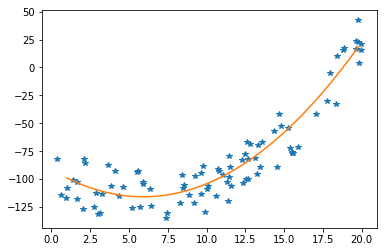

In [314]:
## SA start with regression parameters
T_Start = 1E6
epsilon = 1E-2
start = np.polyfit(X, Y, 2)
qual = chi2err(current,X,Y)
print(current)
print(chi2err(current,X,Y))

def siman(T_S,epsilon,current,qual):
    t = 1
    dE =1000
    c = 0
    good_current = current
    while(True):
        T = coolDown(T_S,t)
        if (T < epsilon):
            return current,dE
        
        nextV = random_successor(current,T)
        #print(nextV)
        dE = qual-chi2err(nextV,X,Y)
        #print(dE)
        if dE > 0:
            current = nextV
            qual = chi2err(current,X,Y)
            good_current = current
            c = 0
            print(current,qual, T)
            ##f_plot(X,Y,current)
        else:
            if np.exp(dE/T) > np.random.rand():
                current = nextV 
                qual2 = chi2err(current,X,Y)
                if (qual2 < qual):
                    qual = qual2
                else:
                    if (c > 100):
                        current = good_current
        t = t + 1
        c = c +1    
current,dE = siman(T_Start,epsilon,start,qual)    
print(current)
print(chi2err(current,X,Y))

f_plot(X,Y,current)





In [331]:
#import necessary modules, set up the plotting
import numpy as np
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,6)
from matplotlib import pyplot as plt
%matplotlib inline
import GPy

In [333]:


m = GPy.examples.regression.sparse_GP_regression_1D(plot=False, optimize=False)

m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [334]:


m.rbf.lengthscale = 0.2
m



sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,0.2,+ve,
Gaussian_noise.variance,1.0,+ve,


In [336]:
m['.*var'] = 2.
m['.*var'] = [2., 3.]
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0,+ve,
rbf.lengthscale,0.2,+ve,
Gaussian_noise.variance,3.0,+ve,


In [337]:
new_params = np.r_[[-4,-2,0,2,4], [.1,2], [.7]]
m[:] = new_params
m  

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,0.1,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,0.7,+ve,


In [338]:


print ("all gradients of the model:\n", m.gradient)
print ("\n gradients of the rbf kernel:\n", m.rbf.gradient)



all gradients of the model:
 [  1.06812058e+00   1.38009321e+00  -1.18364708e-02  -1.46856439e+00
  -1.24361087e+00   1.09405982e+02  -1.62195964e+01  -2.68737265e+02]

 gradients of the rbf kernel:
 [ 109.40598207  -16.21959638]


In [339]:


m.optimize()
m.gradient



array([  1.07526122e-03,   1.67521596e-03,  -4.89182341e-04,
         1.49872710e-03,  -2.81285339e-04,   2.84949929e-05,
        -5.96711173e-04,  -1.36407761e+00])

 /Users/guggisberg/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


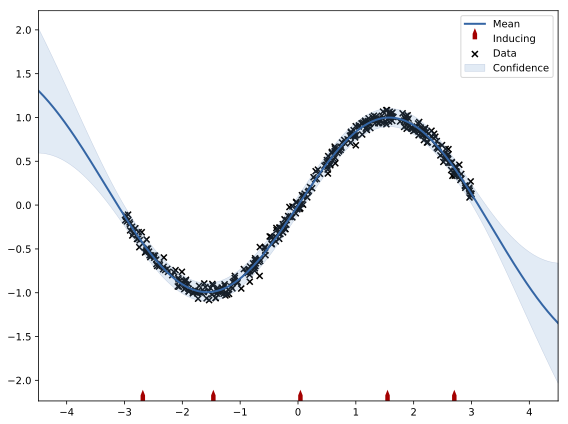

In [340]:


fig = m.plot()



In [346]:
X = np.random.uniform(-3.,3.,(50,1))
Y = np.sin(X) + np.random.randn(50,1)*0.05

In [347]:
import numpy as np
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,6)
from matplotlib import pyplot as plt
%matplotlib inline
import GPy

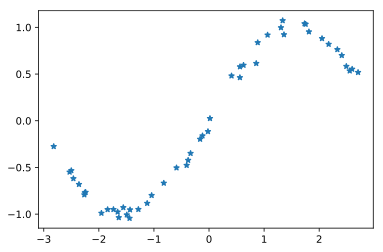

In [350]:
plt.plot(X,Y,'*')

In [351]:
kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)


In [352]:
m.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = -59.245068272722854
Optimization restart 2/20, f = -59.245068272293416
Optimization restart 3/20, f = -59.24506827263707
Optimization restart 4/20, f = -59.24506827157152
Optimization restart 5/20, f = -59.24506827244606
Optimization restart 6/20, f = -59.24506827267298
Optimization restart 7/20, f = -59.24506827272232
Optimization restart 8/20, f = -59.24506827270762
Optimization restart 9/20, f = -59.245068271591364
Optimization restart 10/20, f = -59.24506827262201
Optimization restart 11/20, f = -59.245068272717695
Optimization restart 12/20, f = -59.24506827267396
Optimization restart 13/20, f = -59.24506827263411
Optimization restart 14/20, f = -59.24506827263374
Optimization restart 15/20, f = -59.245068272683966
Optimization restart 16/20, f = -59.245068272701715
Optimization restart 17/20, f = -59.24506827271747
Optimization restart 18/20, f = -59.245068272548636
Optimization restart 19/20, f = -59.24506827270473
Optimization restart 20/20, f = -

 /Users/guggisberg/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


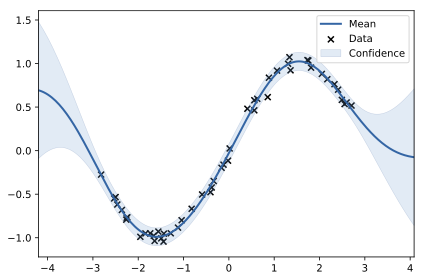

In [353]:
m.plot()